In [200]:
# Импортируем все необходиме модули
# pandas -- для создания датафреймов, как в r, в питоне
# os -- для того, чтобы обращаться к папкам и вообще работать с файловой системой
# seaborn -- для того, чтобы делать красивые картинки
# matplotlib -- этот модуль нужен для seaborn

import numpy as np
import pandas as pd
import matplotlib
import os
from adjustText import adjust_text
from scipy.stats import kendalltau, pearsonr, spearmanr

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 16

In [124]:
df = pd.read_csv(os.path.join('tsv_files', "new_data_fin.tsv"), sep='\t', header=1, decimal=b",")
df.drop("Unnamed: 0", axis=1, inplace=True)
# df

In [125]:
# Грузим сегментрано дуплицированные гены
where_am_i = os.getcwd()
pic_path = os.path.abspath(os.path.join(where_am_i, '..', 'pics_for_publication'))

df_segm_dupl = pd.read_csv(os.path.join(where_am_i, 'tsv_files', 'segm_dupl.tsv'), sep='\t')

In [175]:
# Тут перечислены все гены, которые не являются супер дуплицированными
df_nsd = df.query("gene not in @df_segm_dupl.gene")
df_nsd = df_nsd.reset_index(drop=True)

In [176]:
# Тут перечислены все гены, для которых показан геномный импринтинг
# взял с geneimprint.com
df_imprinted = pd.read_csv(os.path.join(where_am_i, 'tsv_files', 'imprinted_genes.tsv'))

In [128]:
# Потенциально импринтированные гены
df_nsd_imp = df_nsd.query("gene in @df_imprinted.Gene")
df_nsd_imp = df_nsd_imp.reset_index(drop=True)
df_nsd_imp

,gene,heterozygous_sites_l,MAF_l,ASE_l,av_MAF_l,med_MAF_l,stdev_MAF_l,heterozygous_sites_t,MAF_t,ASE_t,av_MAF_t,med_MAF_t,stdev_MAF_t
0,GNAS,37,2,2,0.83,0.83,0.06,38,12,9,0.73,0.72,0.07


### Посмотрим на корреляцию между частотой асэ в норме и опухоли.

In [206]:
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

print("Corr coef is " + str(df_trial["ASE_l"].corr(df_trial["ASE_t"], method="spearman")))
print("p-val is " + str(df_trial["ASE_l"].corr(df_trial["ASE_t"], method=spearmanr_pval)))

Corr coef is 0.40046444870331
p-val is 6.264711041656763e-08


### Посмотрим на онкогены.

In [138]:
df_trial = df_nsd.sort_values("med_MAF_l")
df_trial = df_trial.reset_index(drop=True)
df_trial

,gene,heterozygous_sites_l,MAF_l,ASE_l,av_MAF_l,med_MAF_l,stdev_MAF_l,heterozygous_sites_t,MAF_t,ASE_t,av_MAF_t,med_MAF_t,stdev_MAF_t
0,A1BG,6,2,0,0.53,0.53,0.00,6,4,1,0.65,0.64,0.04
1,CTB-96E2.2,32,6,0,0.53,0.53,0.01,32,12,0,0.60,0.62,0.06
2,FGA,41,22,0,0.55,0.53,0.04,41,21,4,0.62,0.56,0.11
3,SERPIND1,33,3,0,0.54,0.53,0.01,33,9,2,0.64,0.64,0.08
4,ITIH4,47,9,0,0.57,0.54,0.06,47,30,8,0.64,0.64,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,CCND1,5,2,2,0.89,0.89,0.00,9,3,3,0.85,0.89,0.08
166,HPX,1,1,1,0.89,0.89,NaN,1,1,1,0.89,0.89,NaN
167,MAPK1,7,1,1,0.89,0.89,NaN,16,6,6,0.87,0.88,0.02
168,AL590714.1,1,1,1,0.90,0.90,NaN,1,1,1,0.89,0.89,NaN


In [139]:
df_onc = pd.read_csv(os.path.join(os.getcwd(), 'tsv_files', "onc_37.tsv"), sep='\t')

In [178]:
df_onc_sort = df_trial.query("gene in @df_onc.gene_name")
df_onc_sort = df_onc_sort.reset_index(drop=True)
# df_onc_sort

In [177]:
onc_l = ["AR", "ESR1", "DDX5", "SND1", "SKI", "BIRC6", "GNAS", "EPAS1", "BRD4", "KMT2D", 
        "TRRAP", "TFE3", "A1CF", "CHD4", "CSF1R", "ELK4", "NFE2L2", "CCND1", "BCL9L", "ATP1A1"]
sign = [i for i in df_onc_sort["gene"] if i not in onc_l]

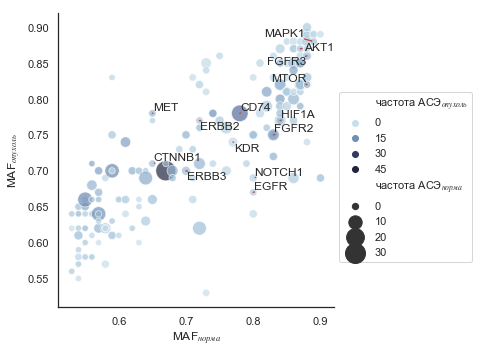

In [174]:
df_trial_ren = df_trial.rename(columns={'ASE_l':'частота АСЭ${_{норма}}$'}, inplace=False)
df_trial_ren.rename(columns={'ASE_t':'частота АСЭ${_{опухоль}}$'}, inplace=True)

sns.set(style="white")

cmap = sns.cubehelix_palette(rot=-.15, as_cmap=True)
sns.relplot(x="med_MAF_l", y="med_MAF_t", 
            size='частота АСЭ${_{норма}}$',
            hue='частота АСЭ${_{опухоль}}$',
            sizes=(40, 400), alpha=.7, palette=cmap,
            data=df_trial_ren)._legend.remove()

plt.legend(bbox_to_anchor=(1,.75))
plt.xlabel("MAF${_{норма}}$")
plt.ylabel("MAF${_{опухоль}}$")

x_l, y_l, s_l, texts = [],[],[],[]

for i in df_onc_sort.iterrows():
    if i[1][0] in sign: x_l.append(i[1][5]);y_l.append(i[1][11]);s_l.append(i[1][0])
        
for x, y, s in zip(x_l, y_l, s_l):
    texts.append(plt.text(x, y, s))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='r', lw=1.5))
plt.savefig(os.path.join(pic_path, 'all_ase_onc_ru.png'), dpi=300, bbox_inches='tight')

### Сделаем картинку, где будут отображены гены, где частота АСЭ в опухоли выше, чем в норме

In [193]:
df_htase = df_nsd.query('ASE_t/ASE_l > 2 & ASE_l>0')
df_htase = df_htase.reset_index(drop=True)
df_htase_sorted = df_htase.sort_values('ASE_t', ascending=False)
df_htase_sorted

,gene,heterozygous_sites_l,MAF_l,ASE_l,av_MAF_l,med_MAF_l,stdev_MAF_l,heterozygous_sites_t,MAF_t,ASE_t,av_MAF_t,med_MAF_t,stdev_MAF_t
37,SETD2,56,4,2,0.76,0.74,0.09,54,16,13,0.77,0.78,0.06
40,SPEN,56,4,4,0.83,0.84,0.05,46,13,12,0.79,0.80,0.07
19,FGL1,29,18,2,0.59,0.57,0.06,29,24,12,0.66,0.70,0.09
0,APOC4,35,19,5,0.63,0.61,0.07,35,19,12,0.72,0.74,0.08
44,UGT2B4,45,37,5,0.61,0.58,0.09,45,34,11,0.66,0.62,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,ELF3,23,1,1,0.79,0.79,NaN,30,5,3,0.72,0.71,0.07
29,NFE2L2,5,1,1,0.88,0.88,NaN,6,3,3,0.82,0.82,0.05
16,FETUB,24,3,1,0.69,0.69,0.01,24,3,3,0.74,0.73,0.03
45,VHL,3,1,1,0.72,0.72,NaN,3,3,3,0.80,0.76,0.08


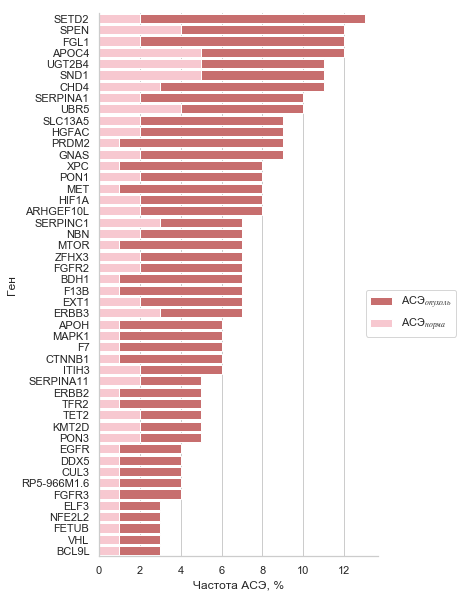

In [194]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(5, 10))

sns.set_color_codes("muted")
sns.barplot(x='ASE_t', y="gene", data=df_htase_sorted,
            label="АСЭ${_{опухоль}}$", color='r')

sns.set_color_codes("muted")
sns.barplot(x="ASE_l", y="gene", data = df_htase_sorted,
            label="АСЭ${_{норма}}$", color="pink")

ax.set(ylabel="Ген",
       xlabel="Частота АСЭ, %")
sns.despine()

plt.legend(bbox_to_anchor=(1.3, .5))
plt.savefig(os.path.join(pic_path, 'high_tumor_ase_frequency_new_2.png'), dpi=300, bbox_inches='tight')

### Гены, где частота АСЭ в норме выше, чем в опухоли

In [196]:
# Все гены, у которых (ase_normal/ase_tumor > 2)
df_hnase = df_nsd.query("ASE_l/ASE_t>2")
df_hnase = df_hnase.reset_index(drop=True)
df_hnase_sorted = df_hnase.sort_values('ASE_l', ascending=False)
df_hnase_sorted

,gene,heterozygous_sites_l,MAF_l,ASE_l,av_MAF_l,med_MAF_l,stdev_MAF_l,heterozygous_sites_t,MAF_t,ASE_t,av_MAF_t,med_MAF_t,stdev_MAF_t
1,FAT4,73,8,8,0.76,0.76,0.04,42,4,3,0.75,0.76,0.06
0,AR,12,7,5,0.74,0.73,0.06,4,1,1,0.85,0.85,NaN
3,KDR,28,6,4,0.76,0.77,0.10,21,2,1,0.74,0.74,0.21
5,SMAD4,11,3,3,0.87,0.88,0.02,9,1,1,0.83,0.83,NaN
2,FGG,35,26,2,0.60,0.58,0.05,35,16,0,0.58,0.57,0.04
4,SLC27A5,13,2,1,0.73,0.73,0.22,13,1,0,0.53,0.53,NaN


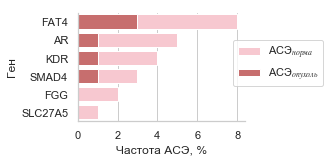

In [197]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(3, 2))

sns.set_color_codes("muted")
sns.barplot(x='ASE_l', y="gene", data=df_hnase_sorted,
            label="АСЭ${_{норма}}$", color='pink')

sns.set_color_codes("muted")
sns.barplot(x="ASE_t", y="gene", data = df_hnase_sorted,
            label="АСЭ${_{опухоль}}$", color="r")

ax.set(ylabel="Ген",
       xlabel="Частота АСЭ, %")
sns.despine()

plt.legend(bbox_to_anchor=(1.5, .8))
# plt.savefig(os.path.join(pic_path, 'high_normal_ase_frequency_new.png'), dpi=300, bbox_inches='tight')